#### A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


We can deduce the Null and Alternate hypothesis from the given problem statement

Null Hypothesis (H0): There is no difference in the diameter of the cutlet between two units

Alternate Hypothesis (Ha): There is a significant difference in the diameter of the cutlet between two units

In [75]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

cutlets = pd.read_csv('Cutlets.csv')
alpha = 0.05

In [31]:
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [32]:
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [33]:
A = cutlets['Unit A']
B = cutlets['Unit B']

Here we have 2 units to compare with and they are not related to each other, Hence we use 2-sample independent t-test for this problem

In [34]:
A.var()

0.08317945374789915

In [35]:
B.var()

0.11792400440336127

In [36]:
t_stat, p = ttest_ind(A, B, equal_var=False)
print(p)
if p < alpha:
    print('There is a significant difference in the diameter of the cutlet between two units')
else:
    print('There is no difference in the diameter of the cutlet between two units')

0.4723132481914539
There is no difference in the diameter of the cutlet between two units


#### A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
#### Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

We can deduce the Null and Alternate hypothesis from the given problem statement

Null Hypothesis (H0): There is no difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list

Alternate Hypothesis (Ha): There is a significant difference in the average Turn Around Time (TAT) of reports of atleast one of the laboratories on their preferred list

In [37]:
import scipy.stats as stats

In [38]:
lab = pd.read_csv('LabTAT.csv')
alpha = 0.05

In [39]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [40]:
lab.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [41]:
Lab1 = lab['Laboratory 1']
Lab2 = lab['Laboratory 2']
Lab3 = lab['Laboratory 3']
Lab4 = lab['Laboratory 4']

ANOVA Assumptions Check

In [42]:
#1.Shapiro's test for Normality
# H0 : Not a Normal distribution
# Ha : Normal distribution
Labs = [Lab1, Lab2, Lab3, Lab4]
print("Shapiro")
for i in Labs:
    _, psha = stats.shapiro(i)
    #print only those which are normal
    if psha > alpha:
        print(psha)
#2.Levene's test for Variance Equality
# H0 : Equal variance amongst all
# Ha : Violation to the assumption
print("********************")
print("Levene")
lev, plev = stats.levene(Lab1, Lab2, Lab3, Lab4)

print(plev)

#3.All data are equally sized (from above analysis all the datapoints from labs are 120)

Shapiro
0.5506953597068787
0.8637524843215942
0.4205053448677063
0.6618951559066772
********************
Levene
0.05161343808309816


In [43]:
f_statistic, p_value = stats.f_oneway(Lab1,Lab2,Lab3,Lab4)
if p_value < alpha:
    print('There is a significant difference in the average Turn Around Time (TAT) of reports of atleast one of the laboratories on their preferred list')
else:
    print('There is no difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list')

There is a significant difference in the average Turn Around Time (TAT) of reports of atleast one of the laboratories on their preferred list


#### Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

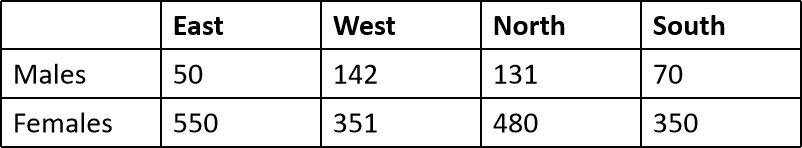

We can deduce the Null and Alternate hypothesis from the given problem statement

Null Hypothesis (H0): The male-female buyer ratios are similar across regions.

Alternate Hypothesis (Ha): The male-female buyer ratios are not similar across regions.

Here we are trying to find out whether there is any dependency between male and female, we are using chi-square test

Chi-square test

Null Hypothesis (H0): There is no association or relationship between the two categorical variables. In other words, the variables are independent of each other.

Alternative Hypothesis (Ha): There is a significant association or relationship between the two categorical variables. In other words, the variables are not independent, and there is some form of dependence or association between them.

Let's assume this experiment is done in 95% confidence, alpha =0.05

In [45]:
buyerRatio = pd.read_csv('BuyerRatio.csv')
alpha = 0.05

In [46]:
buyerRatio.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [50]:
buyerRatio.iloc[:,1:]

,East,West,North,South
0,50,142,131,70
1,435,1523,1356,750


In [51]:
contingency_table = buyerRatio.iloc[:,1:].values.astype(int)

In [52]:
contingency_table

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]])

In [53]:
chi_value, p, dof, expec_freqs = stats.chi2_contingency(contingency_table)

In [55]:
if p < alpha:
    print('The male-female buyer ratios are not similar across regions.')
else:
    print('The male-female buyer ratios are similar across regions.')

The male-female buyer ratios are similar across regions.


#### TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


We can deduce the Null and Alternate hypothesis from the given problem statement

Null Hypothesis (H0): The defective % is similar across centers.

Alternate Hypothesis (Ha): The defective % varies by centre across centers.

In [60]:
customerOrder = pd.read_csv('Costomer+OrderForm.csv')
alpha = 0.05

In [59]:
customerOrder.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [73]:
for i in customerOrder.columns:
    print((customerOrder[i].value_counts())/len(customerOrder)*100)

Error Free    90.333333
Defective      9.666667
Name: Phillippines, dtype: float64
Error Free    89.0
Defective     11.0
Name: Indonesia, dtype: float64
Error Free    89.666667
Defective     10.333333
Name: Malta, dtype: float64
Error Free    93.333333
Defective      6.666667
Name: India, dtype: float64


In [76]:
contingency_table = np.array([[90.33, 89.0, 89.66, 93.33],
                              [9.66, 11.0, 10.33, 6.66]])

In [77]:
contingency_table

array([[90.33, 89.  , 89.66, 93.33],
       [ 9.66, 11.  , 10.33,  6.66]])

In [80]:
chi_value, p, dof, expec_freqs = stats.chi2_contingency(contingency_table)
p

0.7315829673152578

In [79]:
if p < alpha:
    print('The defective % varies by centre across centers.')
else:
    print('The defective % is similar across centers.')

The defective % is similar across centers.


The manager can conclude that there is no evidence to suggest that the centers are performing differently in terms of order form defects based on the provided data.